<img src="https://www.th-koeln.de/img/logo.svg" style="float:right;" width="200">

# 3rd exercise: <font color="#C70039">Do DBScan clustering for anomaly detection</font>
* Course: AML
* Lecturer: <a href="https://www.gernotheisenberg.de/">Gernot Heisenberg</a>
* Author of notebook: <a href="https://www.gernotheisenberg.de/">Gernot Heisenberg</a>
* Date:   26.10.2022
* Studend Name: Jüri Keller
* Studend matriculation number: 11133325

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/a/af/DBSCAN-Illustration.svg/400px-DBSCAN-Illustration.svg.png" style="float: center;" width="450">

---------------------------------
**GENERAL NOTE 1**: 
Please make sure you are reading the entire notebook, since it contains a lot of information on your tasks (e.g. regarding the set of certain paramaters or a specific computational trick), and the written mark downs as well as comments contain a lot of information on how things work together as a whole. 

**GENERAL NOTE 2**: 
* Please, when commenting source code, just use English language only. 
* When describing an observation please use English language, too
* This applies to all exercises throughout this course.  

---------------------

### <font color="ce33ff">DESCRIPTION</font>:
This notebook allows you for using the DBScan clustering algorithm for anomaly detection.

-------------------------------------------------------------------------------------------------------------

### <font color="FFC300">TASKS</font>:
The tasks that you need to work on within this notebook are always indicated below as bullet points. 
If a task is more challenging and consists of several steps, this is indicated as well. 
Make sure you have worked down the task list and commented your doings. 
This should be done by using markdown.<br> 
<font color=red>Make sure you don't forget to specify your name and your matriculation number in the notebook.</font>

**YOUR TASKS in this exercise are as follows**:
1. import the notebook to Google Colab or use your local machine.
2. make sure you specified you name and your matriculation number in the header below my name and date. 
    * set the date too and remove mine.
3. read the entire notebook carefully 
    * add comments whereever you feel it necessary for better understanding
    * run the notebook for the first time. 
4. take the three data sets from exercize 1 and cluster them
5. read the following <a href="https://stats.stackexchange.com/questions/88872/a-routine-to-choose-eps-and-minpts-for-dbscan">article</a> for getting help estimating eps and minPts
    * https://stats.stackexchange.com/questions/88872/a-routine-to-choose-eps-and-minpts-for-dbscan
6. describe your findings and interpret the results
-----------------------------------------------------------------------------------

In [10]:
from sklearn.cluster import DBSCAN
import numpy as np
from numpy.random import randn
np.random.seed(1)
random_data = np.random.randn(50000,2)  * 20 + 20

The output of the below code is 94. This is the total number of noisy points. SKLearn labels the noisy points as (-1). The downside with this method is that the higher the dimension, the less accurate it becomes. You also need to make a few assumptions like estimating the right value for eps which can be challenging.

In [11]:
# hyperparameters
minPts = 2  # minimum number of points in a cluster
eps = 3  # maximum distance between two points in a cluster (neighborhood radius)

outlier_detection = DBSCAN(min_samples = minPts, eps = eps)

clusters = outlier_detection.fit_predict(random_data)

list(clusters).count(-1)

94

In [12]:
import pandas as pd
import matplotlib.pyplot as plt

In [13]:
def plot_2d_cluster(data: pd.Series, cluster: list, xlabel: str="", ylabel: str=""):
    """Plot the data as a scatter plot with all outliers highlighted."""
    data["cluster"] = cluster
    for c in set(cluster):
        sliced = data[data.cluster == c]
        column_name = data.columns[1]
        if c == -1:
            plt.scatter(sliced.index, sliced[column_name], c="red",marker="x" )
        else:
            plt.scatter(sliced.index, sliced[column_name], alpha=0.5)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.show()

# Iris (normal)

In [14]:
from sklearn import datasets
import pandas as pd
import matplotlib.pyplot as plt

from scipy.stats import zscore

Num outliers: 16


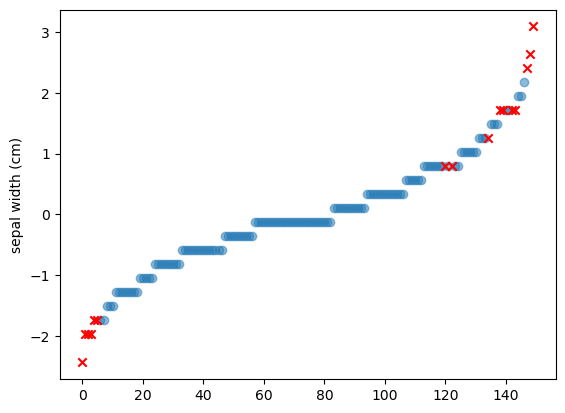

In [15]:
iris = datasets.load_iris()
iris_df = pd.DataFrame(iris["data"], columns = iris["feature_names"])
data = iris_df["sepal width (cm)"].sort_values().reset_index(drop=False).apply(zscore)  # sort and normalize

outlier_detection = DBSCAN(min_samples = 5, eps = 0.4)

# only one feature
clusters = outlier_detection.fit_predict(data)
print("Num outliers:", list(clusters).count(-1))

plot_2d_cluster(data, clusters, ylabel="sepal width (cm)")

Num outliers: 4


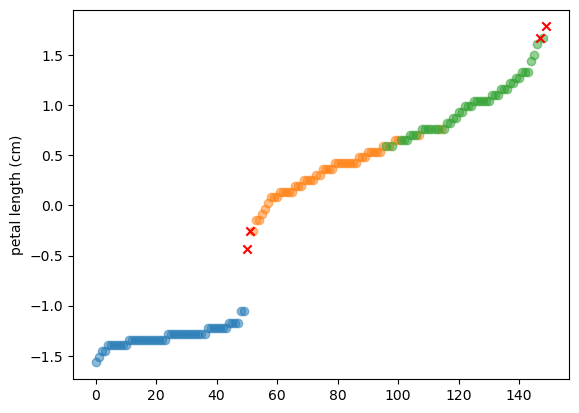

In [16]:
data = iris_df["petal length (cm)"].sort_values().reset_index(drop=False).apply(zscore)  # sort and normalize
outlier_detection = DBSCAN(min_samples = 5, eps = 0.3)

# only one feature
clusters = outlier_detection.fit_predict(data)
print("Num outliers:", list(clusters).count(-1))

plot_2d_cluster(data, clusters, ylabel="petal length (cm)")

## Wine (normal)

Num outliers: 1


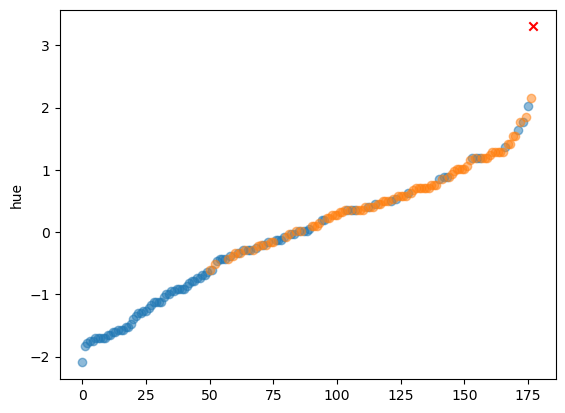

In [17]:
wine = datasets.load_wine()
wine_df = pd.DataFrame(wine["data"], columns = wine["feature_names"]).apply(zscore)
data = wine_df["hue"].sort_values().reset_index(drop=False)

# only one feature
outlier_detection = DBSCAN(min_samples=4, eps=2.5)
clusters = outlier_detection.fit_predict(data)
print("Num outliers:", list(clusters).count(-1))

plot_2d_cluster(data, clusters, ylabel="hue")


## Titanic (not normal)

Num outliers: 12


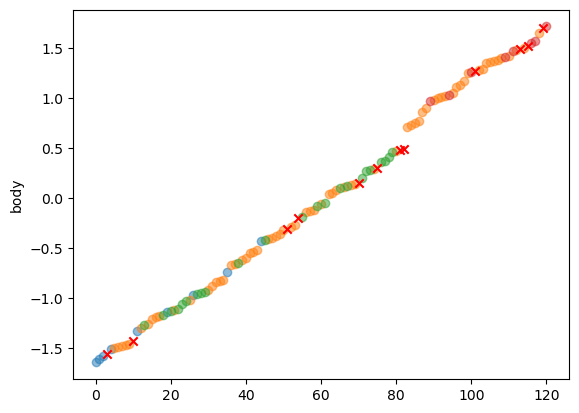

In [18]:
titanic = datasets.fetch_openml("titanic", version=1)
titanic_df = pd.DataFrame(titanic["data"], columns = titanic["feature_names"])
data = titanic_df["body"].sort_values().reset_index(drop=False).dropna().apply(zscore)

outlier_detection = DBSCAN(min_samples = 3, eps = 0.35)
clusters = outlier_detection.fit_predict(data)
print("Num outliers:", list(clusters).count(-1))

plot_2d_cluster(data, clusters, ylabel="body")

 ### 5. Read the following <a href="https://stats.stackexchange.com/questions/88872/a-routine-to-choose-eps-and-minpts-for-dbscan">article</a> for getting help estimating eps and minPts:
- eps
    - OPTICS (a variation of DBSCAN) can estimate the epsilon (eps) by "trying every solution"
        - Hirarchical cluster
    - Other opition:
        - minPts = $x$
        - compute $x$ knn for each point
        - sort distances
        - plot as elbow
        - select the elbow/knee
- minPts: needs domain knowledge
    - Bin size
    - Can be estimated by the number of dimensions as a starting point: minPts >= D + 1. For 2D data, take minPts = 4. For larger datasets
    - Grid search
- Distance function also importend: 
    - not only Euclidean distance



### 6. describe your findings and interpret the results

- DB scan is hard to visualize, outliers are less easy to "check"
- DB scan can use more then one dimension
- difficult with not standardized data -> zstandardization helps
- Domain knowledge is needed
- The density based, one parameter for the full distribution but the data can be different distributed